In [1]:
%pip install pandas plotnine geopandas shapely matplotlib contextily 

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


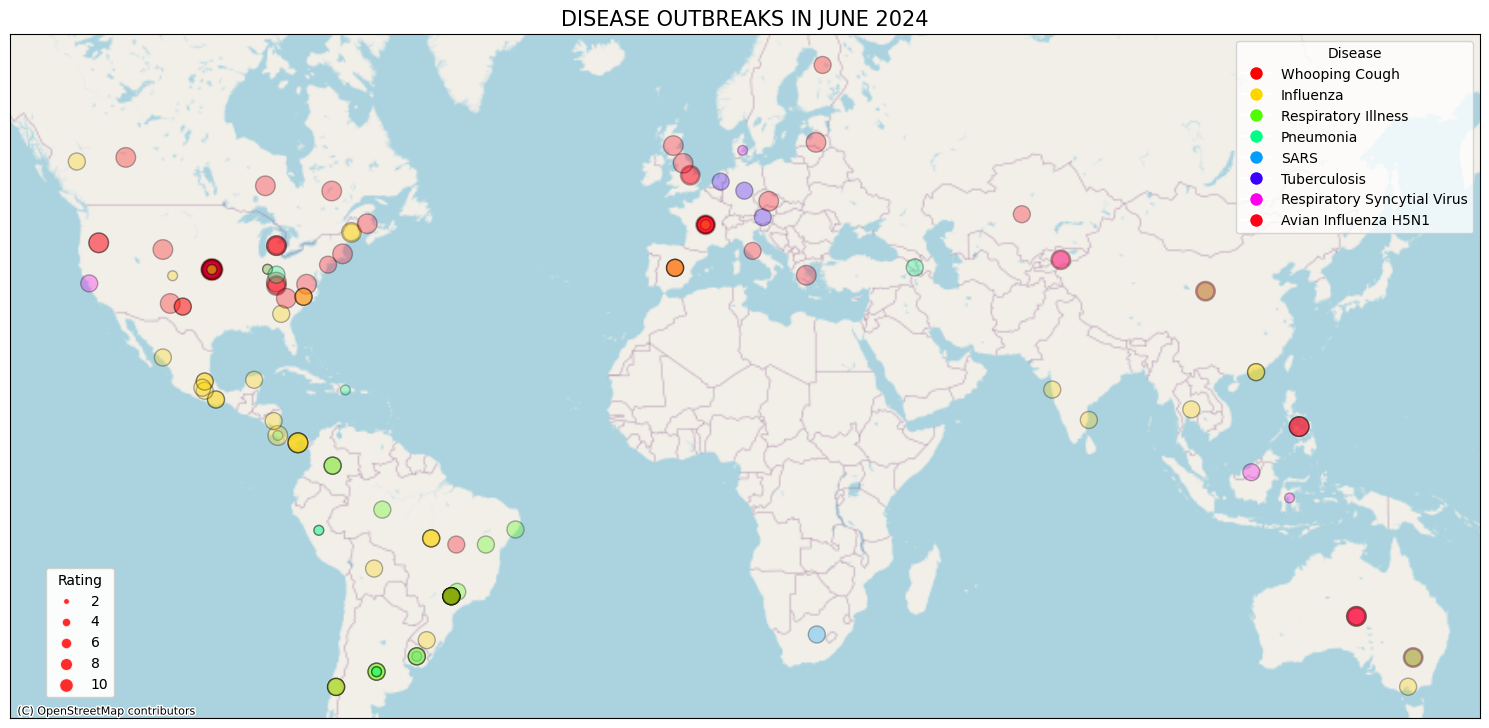

In [6]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_point, theme_minimal, labs, scale_color_brewer, scale_size

# Load the data
data = pd.read_csv('world_disease_data.csv')

df = pd.DataFrame(data)

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Lng'], df['Lat']))

# Set the coordinate reference system (CRS) to EPSG:4326 (WGS 84)
gdf.set_crs(epsg=4326, inplace=True)

# Reproject to EPSG:3857
gdf = gdf.to_crs(epsg=3857)

# Convert GeoDataFrame to Pandas DataFrame for Plotnine
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y

# Create a 'Plotnine' plot for visualization
plot = (
    ggplot(gdf) +
    aes(x='x', y='y', color='Disease', size='Rating') +
    geom_point(alpha=0.6) +
    theme_minimal() +
    labs(title='Disease Outbreaks', x='Longitude', y='Latitude', color='Disease', size='Rating') +
    scale_color_brewer(type='qual', palette='Dark2') +
    scale_size(range=(2, 10))
)

# Display the Plotnine plot
# print(plot)

# Plot the data with Matplotlib
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the points with color and size
scatter = ax.scatter(gdf['x'], gdf['y'], c=gdf['Disease'].astype('category').cat.codes, 
                     s=gdf['Rating']*50, cmap='hsv', alpha=0.3, edgecolor='black')

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add title and labels
ax.set_title('DISEASE OUTBREAKS IN JUNE 2024', fontsize = 15)
ax.set_xlabel('')
ax.set_ylabel('')

# Avoid scientific notation on the axes
ax.ticklabel_format(useOffset=False, style='plain')

# Create custom legends
diseases = gdf['Disease'].unique()
colors = scatter.cmap(scatter.norm(range(len(diseases))))

# Color legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10) 
           for i in range(len(diseases))]
labels = diseases
legend1 = ax.legend(handles, labels, title="Disease", loc='upper right', bbox_to_anchor=(1, 1))

# Size legend
sizes = [2, 4, 6, 8, 10]
handles = [plt.scatter([], [], s=size*10, color='red', alpha=0.8, edgecolor='w') for size in sizes]
labels = [str(size) for size in sizes]
legend2 = ax.legend(handles, labels, title="Rating", loc='lower left', bbox_to_anchor=(0.02, 0.02))

# Add legends to the plot
ax.add_artist(legend1)
ax.add_artist(legend2)

# Remove the axis ticks and labels for a cleaner look
ax.set_xticks([])
ax.set_yticks([])

# Adjust the subplot to fit the legends
plt.tight_layout()

# Show plot
plt.show()
